In [1]:
import pandas as pd
from datetime import datetime,timedelta
import numpy as np
import matplotlib.pyplot as plt


Approaches
- Train one model for one feature
- Apply on multiple satellites
- Best settings : Ridge Regression alpha = 10.0

In [3]:
sat_data = pd.read_csv('sample_dataset/satelite_data_retrieved_102025.csv')
sat_data

,Unnamed: 0,Satellite Name,Epoch,First Derivative Mean Motion,Second Derivative Mean Motion,BSTAR Drag Term,Element Set Number,Inclination (degrees),Right Ascension of the Ascending Node (degrees),Eccentricity,Argument of Perigee (degrees),Mean Anomaly (degrees),Mean Motion (revolutions per day),Revolution Number at Epoch,type
0,0,25544U 98067A,22365.959384,0.000158,0.0,0.0,999.0,51.6449,76.8793,0.000522,208.3439,324.5958,15.497993,37585.0,LEO
1,1,25544U 98067A,22365.893442,0.000156,0.0,0.0,999.0,51.6447,77.2054,0.000528,208.4572,316.3304,15.497963,37584.0,LEO
2,2,25544U 98067A,23001.269914,0.000160,0.0,0.0,999.0,51.6448,75.3411,0.000520,209.5406,257.0907,15.498110,37590.0,LEO
3,3,25544U 98067A,23001.532508,0.000167,0.0,0.0,999.0,51.6444,74.0407,0.000521,211.7305,280.9843,15.498233,37594.0,LEO
4,4,25544U 98067A,23001.728301,0.000172,0.0,0.0,999.0,51.6445,73.0716,0.000515,212.0396,293.8042,15.498321,37597.0,LEO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54605,496,29100U 93016AP,24359.738743,0.000031,0.0,0.0,999.0,70.7277,135.2557,0.007247,149.8463,210.6858,14.109470,15600.0,SSO
54606,497,29100U 93016AP,24359.738743,0.000031,0.0,0.0,999.0,70.7277,135.2557,0.007247,149.8463,210.6858,14.109470,15528.0,SSO
54607,498,29100U 93016AP,24360.376797,0.000034,0.0,0.0,999.0,70.7284,133.9076,0.007264,148.7154,211.8319,14.109522,15537.0,SSO
54608,499,29100U 93016AP,24362.787204,0.000036,0.0,0.0,999.0,70.7289,128.8106,0.007232,145.0977,215.4915,14.109703,15643.0,SSO


In [4]:
sat_data.type.unique()

array(['LEO', 'MEO', 'GEO', 'SSO'], dtype=object)

In [5]:
sat_data[sat_data.type == 'GEO']

,Unnamed: 0,Satellite Name,Epoch,First Derivative Mean Motion,Second Derivative Mean Motion,BSTAR Drag Term,Element Set Number,Inclination (degrees),Right Ascension of the Ascending Node (degrees),Eccentricity,Argument of Perigee (degrees),Mean Anomaly (degrees),Mean Motion (revolutions per day),Revolution Number at Epoch,type
31834,0,41866U 16071A,22365.780656,-2.400000e-06,0.0,0.0,999.0,0.0800,251.4898,0.000083,55.4317,359.0918,1.002708,2244.0,GEO
31835,1,41866U 16071A,23001.426200,-2.380000e-06,0.0,0.0,999.0,0.0790,250.8475,0.000086,59.9582,228.2383,1.002708,2245.0,GEO
31836,2,41866U 16071A,23002.545634,-2.370000e-06,0.0,0.0,999.0,0.0859,253.9732,0.000090,55.3346,273.8393,1.002728,2246.0,GEO
31837,3,41866U 16071A,23002.860784,-2.360000e-06,0.0,0.0,999.0,0.0854,253.5142,0.000089,52.0418,31.3549,1.002717,2246.0,GEO
31838,4,41866U 16071A,23003.546331,-2.360000e-06,0.0,0.0,999.0,0.0842,252.9575,0.000090,53.8585,277.5678,1.002718,2247.0,GEO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36767,655,40129U 14050B,24360.147801,-9.300000e-07,0.0,0.0,999.0,49.4752,294.4512,0.161608,159.4331,207.9334,1.855204,7045.0,GEO
36768,656,40129U 14050B,24360.147801,-9.300000e-07,0.0,0.0,999.0,49.4752,294.4512,0.161608,159.4331,207.9334,1.855204,7048.0,GEO
36769,657,40129U 14050B,24361.225780,-8.500000e-07,0.0,0.0,999.0,49.4740,294.4077,0.161614,159.4725,207.8829,1.855204,7050.0,GEO
36770,658,40129U 14050B,24362.303762,-7.500000e-07,0.0,0.0,999.0,49.4728,294.3642,0.161619,159.5130,207.8316,1.855204,7049.0,GEO


In [6]:
sat_data.groupby('Satellite Name').size(), len(sat_data.groupby('Satellite Name').size())

(Satellite Name
 06437U 73023A       854
 20580U 90037B      1581
 25544U 98067A      4548
 25994U 99068A      3253
 27424U 02022A      3269
 29100U 93016AP      501
 29499U 06044A      1796
 31102U 07009A      1781
 32360U 99025CZD     388
 34195U 92072AB      815
 36878U 81043R       507
 37372U 11009A       981
 37846U 11060A       521
 38771U 12049A      3259
 38997U 12064A       232
 39084U 13008A      3258
 39188U 13031A      1872
 39189U 13031B      1003
 39190U 13031C       975
 39634U 14016A      3149
 40082U 14038D       892
 40129U 14050B       660
 40697U 15028A      3112
 41345U 00055HN      966
 41866U 16071A      1527
 42775U 17036L      1397
 43234U 18024D       545
 43764U 18099G      1670
 44714U 19074B      1861
 44716U 19074D      1840
 45543U 20025N      1840
 47944U 21022N      1684
 49451U 21104AV     1768
 6437U 73023A        305
 dtype: int64,
 34)

In [7]:
LEO_sat = sat_data[sat_data.type == 'LEO']['Satellite Name'].unique()
# GEO_sat = sat_data[sat_data.type == 'GEO']['Satellite Name'].unique()

# test_set = sat_data['Satellite Name'].unique()[30:]
# train_sat
LEO_sat
# GEO_sat

array(['25544U 98067A', '44714U 19074B', '44716U 19074D', '20580U 90037B',
       '25994U 99068A', '27424U 02022A', '39634U 14016A', '47944U 21022N',
       '43764U 18099G'], dtype=object)

In [8]:
def tle_epoch_to_datetime(epoch: str) -> datetime:
    """
    Converts a TLE epoch string (YYDDD.fractionalday) to a datetime object.

    Args:
        epoch (str): The TLE epoch string in the format YYDDD.fractionalday.

    Returns:
        datetime: The corresponding datetime object.

    Raises:
        ValueError: If the epoch string is invalid or the year is invalid.
    """
    if not isinstance(epoch, str) or len(epoch) < 5:
        raise ValueError("Invalid TLE epoch format. Must be YYDDD.fractionalday.")

    year_str = epoch[:2]
    day_str = epoch[2:]

    try:
        year = int(year_str)
        day_of_year = float(day_str)
    except ValueError:
        raise ValueError("Invalid TLE epoch format.  Must be YYDDD.fractionalday.")

    if year < 0 or year > 99:
        raise ValueError("Invalid TLE year.  Must be 0-99.")

    # Determine the century
    century = 2000 if year < 57 else 1900  # Year 57 is the cutoff

    # Calculate the full year.
    full_year = century + year

    # Create a datetime object for the beginning of the year
    start_of_year = datetime(full_year, 1, 1)

    # Calculate the timedelta for the day of year (including fractional part)
    day_delta = timedelta(days=day_of_year - 1)  # Subtract 1 as the year starts on day 1

    # Add the timedelta to the start of the year
    # (year, month, day, hour=0, minute=0, second=0)
    return start_of_year + day_delta

In [9]:
# Test 
selected_sat = LEO_sat[:10]
# selected_sat = GEO_sat[:10]

selected_sat

array(['25544U 98067A', '44714U 19074B', '44716U 19074D', '20580U 90037B',
       '25994U 99068A', '27424U 02022A', '39634U 14016A', '47944U 21022N',
       '43764U 18099G'], dtype=object)

In [10]:
# resample_tle_df = sat_data[sat_data['Satellite Name'] == selected_sat ]
resample_tle_df = sat_data[sat_data['Satellite Name'].isin(selected_sat) ]
resample_tle_df['Epoch'] = resample_tle_df['Epoch'].astype(str).apply(lambda x : tle_epoch_to_datetime(x))


resample_tle_df.set_index('Epoch', inplace=True)
print(resample_tle_df.shape )
resample_tle_df.tail()

(22855, 14)


/tmp/ipykernel_339501/1747440844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resample_tle_df['Epoch'] = resample_tle_df['Epoch'].astype(str).apply(lambda x : tle_epoch_to_datetime(x))


,Unnamed: 0,Satellite Name,First Derivative Mean Motion,Second Derivative Mean Motion,BSTAR Drag Term,Element Set Number,Inclination (degrees),Right Ascension of the Ascending Node (degrees),Eccentricity,Argument of Perigee (degrees),Mean Anomaly (degrees),Mean Motion (revolutions per day),Revolution Number at Epoch,type
Epoch,,,,,,,,,,,,,,
2024-12-29 10:04:22.582848,1665,43764U 18099G,0.000311,0.0,0.0,999.0,97.4946,66.1236,0.001254,351.8854,8.2177,15.215793,33256.0,LEO
2024-12-29 17:57:51.977664,1666,43764U 18099G,0.000341,0.0,0.0,999.0,97.4945,66.4511,0.001252,350.8308,9.2697,15.216044,33261.0,LEO
2024-12-29 17:57:51.977664,1667,43764U 18099G,0.000341,0.0,0.0,999.0,97.4945,66.4511,0.001252,350.8308,9.2697,15.216044,33261.0,LEO
2024-12-31 03:06:26.538048,1668,43764U 18099G,0.000360,0.0,0.0,999.0,97.4939,67.8260,0.001247,345.7903,14.2980,15.217058,33282.0,LEO
2024-12-31 10:59:53.617344,1669,43764U 18099G,0.000336,0.0,0.0,999.0,97.4938,68.1535,0.001250,344.4591,15.6259,15.217271,33287.0,LEO


In [11]:
resample_tle_df['Satellite Name'].unique()

array(['25544U 98067A', '44714U 19074B', '44716U 19074D', '20580U 90037B',
       '25994U 99068A', '27424U 02022A', '39634U 14016A', '47944U 21022N',
       '43764U 18099G'], dtype=object)

In [12]:
selected_sat_name = selected_sat[0]
selected_sat_name

'25544U 98067A'

In [13]:
sat_df = resample_tle_df[resample_tle_df['Satellite Name'] == selected_sat_name].copy()
sat_df.shape

(4548, 14)

# ADF all features

In [14]:
selected_cols = [ 
       'First Derivative Mean Motion',  'Inclination (degrees)',
       'Right Ascension of the Ascending Node (degrees)', 'Eccentricity',
       'Argument of Perigee (degrees)', 'Mean Anomaly (degrees)',
       'Mean Motion (revolutions per day)', 'Revolution Number at Epoch']
resample_tle_df = resample_tle_df[selected_cols].resample('D').mean().dropna()

In [15]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF : unit root test ==> null hypothesis is non-stationary
# Kwiatkowski–Phillips–Schmidt–Shin (KPSS) Test ==> null hypothesis is stationary

print('At confidence level 90%')

for col in selected_cols:
    col_series = resample_tle_df[col]
    
    print(f"Features : {col}")
    # Perform the ADF test
    adf_result = adfuller(col_series)
    #     print("ADF Statistic:", adf_result[0])
    #     print("p-value:", adf_result[1])
    #     print("Critical Values:", adf_result[4])
    
    if adf_result[1] < 0.1:
        print(f'p-value: {adf_result[1]} , Reject null for ADF: Stationary')
    else:
        print(f'p-value: {adf_result[1]} , Accept null for ADF: Non-stationary')
        
    # Perform the KPSS test
    #     kpss_result = kpss(col_series)

    #     if kpss_result[1] < 0.05:
    #         print('Reject null for KPSS: Non-stationary')
    #     else:
    #         print('Accept null for KPSS: Stationary')
    
    print('=='*30)

At confidence level 90%
Features : First Derivative Mean Motion
p-value: 2.0426842702098006e-15 , Reject null for ADF: Stationary
Features : Inclination (degrees)
p-value: 0.001583149746499004 , Reject null for ADF: Stationary
Features : Right Ascension of the Ascending Node (degrees)
p-value: 0.00035178244758936274 , Reject null for ADF: Stationary
Features : Eccentricity
p-value: 0.007820388967347207 , Reject null for ADF: Stationary
Features : Argument of Perigee (degrees)
p-value: 7.026961214993616e-07 , Reject null for ADF: Stationary
Features : Mean Anomaly (degrees)
p-value: 3.828515473279321e-08 , Reject null for ADF: Stationary
Features : Mean Motion (revolutions per day)
p-value: 0.09825031565839831 , Reject null for ADF: Stationary
Features : Revolution Number at Epoch
p-value: 0.6705421901516363 , Accept null for ADF: Non-stationary


In [16]:
# Non-periodic features (not degree)
# 'Inclination (degrees)','Right Ascension of the Ascending Node (degrees)', 'Eccentricity','Argument of Perigee (degrees)', 'Mean Anomaly (degrees)',
selected_cols = [ 
       'First Derivative Mean Motion', 
        'Eccentricity',
       'Mean Motion (revolutions per day)', 'Revolution Number at Epoch',
'Inclination (degrees)','Right Ascension of the Ascending Node (degrees)','Argument of Perigee (degrees)', 'Mean Anomaly (degrees)',]

In [17]:
# resample_tle_df.head()

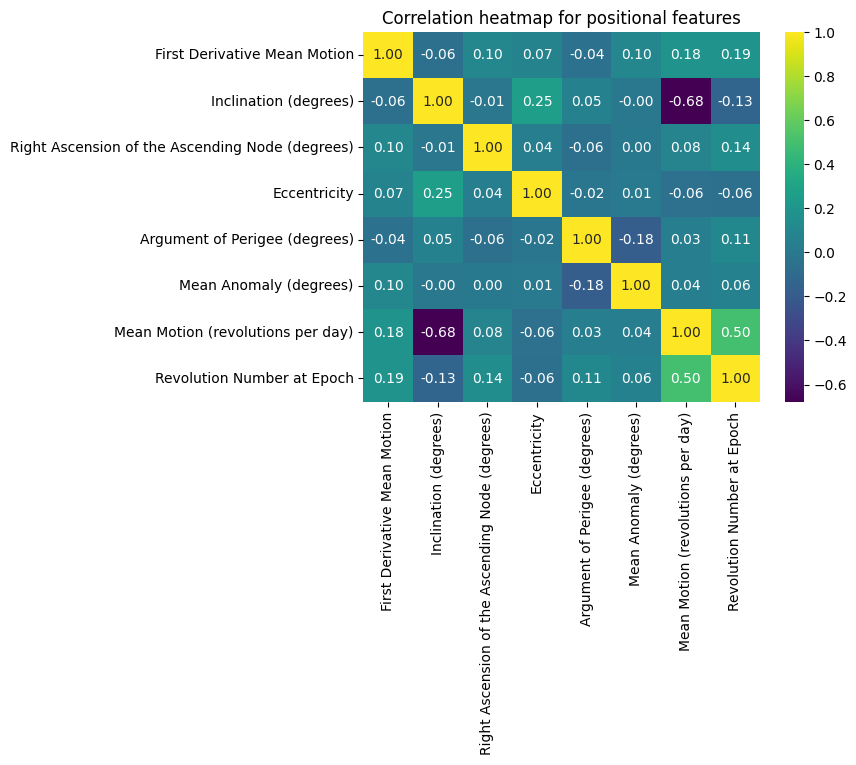

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
df_corr = resample_tle_df.corr()

sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="viridis", annot_kws={"ha": "center", "va": "center"}) # fmt=".0f" for integer values
plt.title('Correlation heatmap for positional features')
plt.show()

# Function for Feature preparation

In [19]:
def encode_cyclical_feature(df: pd.DataFrame, column_name: str, period: float = 360.0) -> pd.DataFrame:
    """
    Encodes a cyclical feature (like degrees, hours, or months) using
    sine and cosine projection.

    Args:
        df (pd.DataFrame): The input DataFrame.
        column_name (str): The name of the cyclical feature column (in degrees).
        period (float): The length of the cycle (e.g., 360 for degrees, 24 for hours).
                        Defaults to 360.0.

    Returns:
        pd.DataFrame: A new DataFrame with two added columns:
                      <column_name>_sin and <column_name>_cos.
    """
    print(f"--- Encoding '{column_name}' with period {period} ---")

    # 1. Conversion to Radians: Necessary for NumPy's sin/cos functions.
    # The formula converts the value into a proportion of the cycle (0 to 2*pi).
    angle_rad = 2 * np.pi * df[column_name] / period

    # 2. Sine and Cosine Projection
    sin_col = f'{column_name}_sin'
    cos_col = f'{column_name}_cos'

    df[sin_col] = np.sin(angle_rad)
    df[cos_col] = np.cos(angle_rad)

    # Optional: Drop the original column if you don't need it.
    # df = df.drop(columns=[column_name])

    print(f"Created columns: '{sin_col}' and '{cos_col}'")
    return df

def decode_cyclical_feature(df: pd.DataFrame, sin_col: str, cos_col: str, period: float = 360.0) -> pd.DataFrame:
    """
    Reconstructs the original cyclical feature value (in degrees) from its
    sine and cosine components.

    Args:
        df (pd.DataFrame): The input DataFrame containing sine and cosine components.
        sin_col (str): The name of the sine component column.
        cos_col (str): The name of the cosine component column.
        period (float): The length of the cycle (e.g., 360 for degrees, 24 for hours).
                        Defaults to 360.0.

    Returns:
        pd.DataFrame: The DataFrame with a new reconstructed column.
    """
    print(f"\n--- Decoding from '{sin_col}' and '{cos_col}' ---")
    reconstructed_col = f'{sin_col.split("_sin")[0]}_reconstructed'

    # 1. Use arctan2 to get the angle in radians (range: [-pi, pi]).
    # arctan2 is crucial as it correctly handles all four quadrants.
    angle_rad = np.arctan2(df[sin_col], df[cos_col])

    # 2. Scale back to the original period (e.g., [0, 360]).
    # Formula: (angle_rad / (2 * pi)) * period
    angle_normalized = angle_rad * (period / (2 * np.pi))

    # 3. Handle the cyclical nature to ensure the result is non-negative (e.g., [0, 360)).
    # The decoded value might be negative (e.g., -90 degrees). We shift it to the
    # equivalent positive value (e.g., 270 degrees).
    df[reconstructed_col] = np.where(angle_normalized < 0,
                                     angle_normalized + period,
                                     angle_normalized)

    print(f"Reconstructed column: '{reconstructed_col}'")
    return df

In [20]:
def feature_preparation(input_df):
    
    # First difference
    temp_df = input_df.copy()
    temp_df['Revolution Number at Epoch_Diff'] =  temp_df['Revolution Number at Epoch'].diff()
    initial_revs = temp_df['Revolution Number at Epoch'][0]
    
    # Cyclical Features
    CYCLE_PERIOD = 360.0
    FEATURE_COL = 'Right Ascension of the Ascending Node (degrees)'
    temp_df = encode_cyclical_feature(temp_df, FEATURE_COL, CYCLE_PERIOD)

    FEATURE_COL = 'Argument of Perigee (degrees)'
    temp_df = encode_cyclical_feature(temp_df, FEATURE_COL, CYCLE_PERIOD)

    FEATURE_COL = 'Mean Anomaly (degrees)'
    temp_df = encode_cyclical_feature(temp_df, FEATURE_COL, CYCLE_PERIOD)
    
    temp_df.dropna(inplace=True)


    return temp_df, initial_revs
    

<Axes: xlabel='Epoch'>

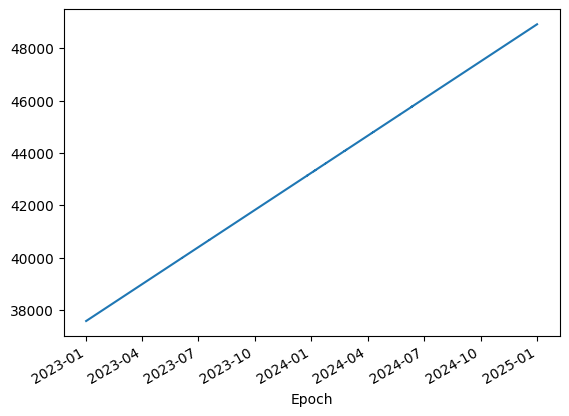

In [21]:
sat_df['Revolution Number at Epoch'][1:].plot()

In [22]:
data_for_training, initial_revs = feature_preparation(sat_df)
initial_revs, #data_for_training.head()

--- Encoding 'Right Ascension of the Ascending Node (degrees)' with period 360.0 ---
Created columns: 'Right Ascension of the Ascending Node (degrees)_sin' and 'Right Ascension of the Ascending Node (degrees)_cos'
--- Encoding 'Argument of Perigee (degrees)' with period 360.0 ---
Created columns: 'Argument of Perigee (degrees)_sin' and 'Argument of Perigee (degrees)_cos'
--- Encoding 'Mean Anomaly (degrees)' with period 360.0 ---
Created columns: 'Mean Anomaly (degrees)_sin' and 'Mean Anomaly (degrees)_cos'


/tmp/ipykernel_339501/542560051.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initial_revs = temp_df['Revolution Number at Epoch'][0]


(37585.0,)

In [23]:
data_for_training.columns

Index(['Unnamed: 0', 'Satellite Name', 'First Derivative Mean Motion',
       'Second Derivative Mean Motion', 'BSTAR Drag Term',
       'Element Set Number', 'Inclination (degrees)',
       'Right Ascension of the Ascending Node (degrees)', 'Eccentricity',
       'Argument of Perigee (degrees)', 'Mean Anomaly (degrees)',
       'Mean Motion (revolutions per day)', 'Revolution Number at Epoch',
       'type', 'Revolution Number at Epoch_Diff',
       'Right Ascension of the Ascending Node (degrees)_sin',
       'Right Ascension of the Ascending Node (degrees)_cos',
       'Argument of Perigee (degrees)_sin',
       'Argument of Perigee (degrees)_cos', 'Mean Anomaly (degrees)_sin',
       'Mean Anomaly (degrees)_cos'],
      dtype='object')

## Columns for training

In [24]:
gt_features = ['First Derivative Mean Motion', 'Inclination (degrees)',
       'Right Ascension of the Ascending Node (degrees)',
       'Argument of Perigee (degrees)', 'Mean Anomaly (degrees)',
       'Eccentricity', 'Mean Motion (revolutions per day)',
       'Revolution Number at Epoch']

In [25]:
raw_features = ['First Derivative Mean Motion', 'Inclination (degrees)','Eccentricity','Mean Motion (revolutions per day)']

diff_features = ['Revolution Number at Epoch_Diff']

cyclical_features = ['Right Ascension of the Ascending Node (degrees)_sin',
        'Right Ascension of the Ascending Node (degrees)_cos',
        'Argument of Perigee (degrees)_sin',
        'Argument of Perigee (degrees)_cos', 
        'Mean Anomaly (degrees)_sin',
        'Mean Anomaly (degrees)_cos']

In [26]:
all_features = raw_features+diff_features+cyclical_features
all_features

['First Derivative Mean Motion',
 'Inclination (degrees)',
 'Eccentricity',
 'Mean Motion (revolutions per day)',
 'Revolution Number at Epoch_Diff',
 'Right Ascension of the Ascending Node (degrees)_sin',
 'Right Ascension of the Ascending Node (degrees)_cos',
 'Argument of Perigee (degrees)_sin',
 'Argument of Perigee (degrees)_cos',
 'Mean Anomaly (degrees)_sin',
 'Mean Anomaly (degrees)_cos']

# Training models

In [27]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [28]:
data = data_for_training[all_features].copy()

# Clean Nan
data.dropna(inplace=True)
data.head()

,First Derivative Mean Motion,Inclination (degrees),Eccentricity,Mean Motion (revolutions per day),Revolution Number at Epoch_Diff,Right Ascension of the Ascending Node (degrees)_sin,Right Ascension of the Ascending Node (degrees)_cos,Argument of Perigee (degrees)_sin,Argument of Perigee (degrees)_cos,Mean Anomaly (degrees)_sin,Mean Anomaly (degrees)_cos
Epoch,,,,,,,,,,,
2022-12-31 21:26:33.429408,0.000156,51.6447,0.000528,15.497963,-1.0,0.975170,0.221457,-0.476502,-0.879173,-0.690499,0.723334
2023-01-01 06:28:40.541088,0.000160,51.6448,0.000520,15.498110,6.0,0.967450,0.253064,-0.493040,-0.870007,-0.974725,-0.223408
2023-01-01 12:46:48.697248,0.000167,51.6444,0.000521,15.498233,4.0,0.961457,0.274954,-0.525924,-0.850531,-0.981679,0.190540
2023-01-01 17:28:45.194304,0.000172,51.6445,0.000515,15.498321,3.0,0.956669,0.291176,-0.530505,-0.847682,-0.914930,0.403612
2023-01-02 00:52:04.330272,0.000172,51.6446,0.000516,15.498430,5.0,0.948581,0.316533,-0.549301,-0.835624,-0.520116,-0.854096


## Sequence generation

In [29]:
look_back = 3 # 3 days
forecast_horizon = 1
features = []
targets = []
num_samples = data.shape[0]
num_samples

4547

In [30]:
for i in range(num_samples - look_back - forecast_horizon + 1):
    # The input features are the last `look_back` values of all series
    X_window = data.iloc[i : i + look_back].values
    
    # The target variables are the next `forecast_horizon` values of all series
    y_window = data.iloc[i + look_back : i + look_back + forecast_horizon].values
    
    # Flatten the windows to create a single row for the features and targets
    features.append(X_window.flatten())
    targets.append(y_window.flatten())

X = np.array(features)
y = np.array(targets)

print(f"Shape of X (input features): {X.shape}")
print(f"Shape of y (target variables): {y.shape}")

Shape of X (input features): (4544, 33)
Shape of y (target variables): (4544, 11)


In [31]:
X_scaler = StandardScaler()
y_scaler = StandardScaler()

X_scaled = X_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y)

# --- 4. Splitting the Data ---
# For time series, we split chronologically. The last 20% of the data
# will be used for testing.
split_index = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:split_index], X_scaled[split_index:]
y_train, y_test = y_scaled[:split_index], y_scaled[split_index:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3635, 33), (3635, 11), (909, 33), (909, 11))

In [32]:
data.index[split_index-1]

Timestamp('2024-08-11 08:11:56.789664')

In [33]:
X_train[:5]

array([[-1.20396156e-02,  2.09236729e+00, -3.57265582e-02,
        -3.50849266e-01, -1.19574104e+00,  1.36513660e+00,
         2.75084962e-01, -8.94482310e-01, -1.69087865e+00,
        -1.15434714e+00,  9.11429123e-01, -8.44951255e-03,
         2.14250762e+00, -6.45785378e-02, -3.23260135e-01,
         1.20037075e+00,  1.35431666e+00,  3.19649511e-01,
        -9.18567620e-01, -1.67793812e+00, -1.56106804e+00,
        -4.41670292e-01, -1.18819561e-03,  1.94931150e+00,
        -6.20659255e-02, -3.00325706e-01,  5.16142649e-01,
         1.34593551e+00,  3.50486994e-01, -9.66113567e-01,
        -1.64936134e+00, -1.57147678e+00,  1.49757554e-01],
       [-8.42578404e-03,  2.14100459e+00, -6.45260893e-02,
        -3.22988653e-01,  1.20041161e+00,  1.35420366e+00,
         3.19764304e-01, -9.18207056e-01, -1.67699742e+00,
        -1.56054117e+00, -4.42066394e-01, -1.16245132e-03,
         1.94786466e+00, -6.19939760e-02, -3.00058924e-01,
         5.15650101e-01,  1.34583081e+00,  3.50591640e-

## Model Training

In [34]:
import os
import joblib
import numpy as np
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.linear_model import Ridge, HuberRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor


In [35]:
# --- Configuration ---
SAVE_DIR = f"Exp2_model_state/forecast_horizon_{forecast_horizon}"
SAVE_RESULT_DIR = f"Exp2_results/"

os.makedirs(SAVE_DIR, exist_ok=True)




In [36]:
model = Ridge(alpha=10.0)
model.fit(X_train, y_train)

Ridge(alpha=10.0)

In [37]:
y_pred_scaled = model.predict(X_test)
y_pred_original = y_scaler.inverse_transform(y_pred_scaled)
y_test_original = y_scaler.inverse_transform(y_test)

y_pred_original.shape, y_test_original.shape

((909, 11), (909, 11))

In [38]:
y_pred_original[:,4].shape, y_test_original[:,4].shape

((909,), (909,))

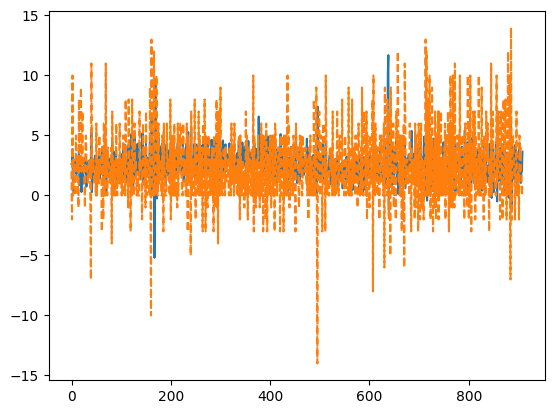

In [39]:
# Visualize

plt.plot(y_pred_original[:,4])
plt.plot(y_test_original[:,4],'--')
plt.show()

In [40]:
df_pred = pd.DataFrame(data=y_pred_original, columns=all_features)
df_pred.head()

,First Derivative Mean Motion,Inclination (degrees),Eccentricity,Mean Motion (revolutions per day),Revolution Number at Epoch_Diff,Right Ascension of the Ascending Node (degrees)_sin,Right Ascension of the Ascending Node (degrees)_cos,Argument of Perigee (degrees)_sin,Argument of Perigee (degrees)_cos,Mean Anomaly (degrees)_sin,Mean Anomaly (degrees)_cos
0,0.000232,51.641358,0.000558,15.499270,2.621848,0.625840,0.777499,-0.144724,-0.964895,-0.471378,0.019440
1,0.000189,51.641497,0.000554,15.499390,2.677445,0.613864,0.786101,-0.147858,-0.960897,-0.417153,-0.087492
2,0.000215,51.641091,0.000555,15.499409,3.869611,0.608111,0.787919,-0.178215,-0.969171,-0.524016,-0.126832
3,0.000211,51.640799,0.000558,15.499548,0.014209,0.595674,0.799882,-0.187004,-0.965898,-0.595241,-0.142484
4,0.000239,51.640799,0.000557,15.499735,1.950843,0.585926,0.808579,-0.186352,-0.966456,-0.714384,0.000644


<Axes: >

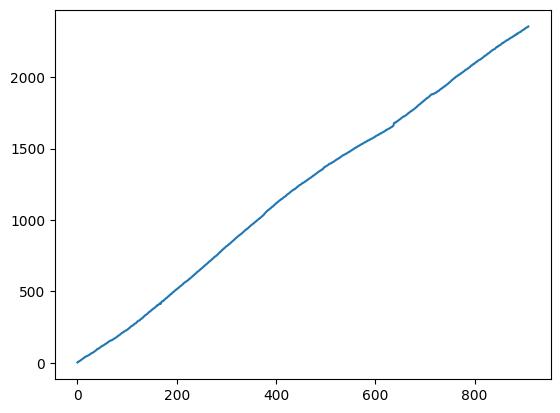

In [41]:
df_pred['Revolution Number at Epoch_Diff'].cumsum().plot()

In [42]:
# df_test_data['Revolution Number at Epoch'].diff().dropna().cumsum().plot()
# df_pred['Revolution Number at Epoch_Diff'].cumsum().plot()

In [43]:
df_test_data = data_for_training[split_index+3:][gt_features]#.reset_index().drop('Epoch',axis=1)
initial_revs = data_for_training.iloc[split_index+2,12]#['Revolution Number at Epoch']
df_test_data.shape, gt_features, initial_revs
df_test_data

,First Derivative Mean Motion,Inclination (degrees),Right Ascension of the Ascending Node (degrees),Argument of Perigee (degrees),Mean Anomaly (degrees),Eccentricity,Mean Motion (revolutions per day),Revolution Number at Epoch
Epoch,,,,,,,,
2024-08-12 00:01:40.572192,0.000231,51.6416,38.8256,187.7228,319.2638,0.000556,15.499371,46720.0
2024-08-11 20:18:05.887008,0.000290,51.6397,39.6008,191.2033,168.8833,0.000556,15.499367,46718.0
2024-08-12 11:55:13.558944,0.000235,51.6416,36.3701,189.7423,203.9955,0.000565,15.499627,46728.0
2024-08-12 11:55:13.558944,0.000262,51.6415,36.3709,189.3540,204.4022,0.000552,15.499714,46728.0
2024-08-12 16:52:03.578880,0.000286,51.6408,35.3500,192.1878,272.5533,0.000539,15.499896,46731.0
...,...,...,...,...,...,...,...,...
2024-12-31 07:31:52.541184,0.000264,51.6404,58.6742,27.5646,63.8191,0.000586,15.505158,48912.0
2024-12-31 10:34:08.171904,0.000264,51.6401,58.0461,28.2226,50.1244,0.000588,15.505227,48914.0
2024-12-31 13:58:39.514656,0.000265,51.6403,57.3420,28.9604,122.7049,0.000593,15.505306,48916.0


In [44]:
def feature_reconstruction(pred_df, initial_revs):
    CYCLE_PERIOD = 360.0
    temp_df = decode_cyclical_feature(pred_df.copy(),
                                         sin_col='Right Ascension of the Ascending Node (degrees)_sin',
                                         cos_col='Right Ascension of the Ascending Node (degrees)_cos',period=CYCLE_PERIOD)
    temp_df = decode_cyclical_feature(temp_df,
                                             sin_col='Argument of Perigee (degrees)_sin',
                                             cos_col='Argument of Perigee (degrees)_cos',period=CYCLE_PERIOD)
    temp_df = decode_cyclical_feature(temp_df,
                                             sin_col='Mean Anomaly (degrees)_sin',
                                             cos_col='Mean Anomaly (degrees)_cos',period=CYCLE_PERIOD)

    reconstructed_cols = [ col for col in temp_df.columns if '_reconstructed' in col]
    encoded_cols = [col for col in temp_df.columns if '_sin' in col or '_cos' in col]
    
    temp_df.drop(encoded_cols, axis=1, inplace=True)  
    
    temp_df['Revolution Number at Epoch'] = temp_df['Revolution Number at Epoch_Diff'].cumsum() + initial_revs
    
    return temp_df[['First Derivative Mean Motion', 'Inclination (degrees)', 
        'Right Ascension of the Ascending Node (degrees)_reconstructed',
       'Argument of Perigee (degrees)_reconstructed',
       'Mean Anomaly (degrees)_reconstructed', 'Eccentricity', 'Mean Motion (revolutions per day)', 'Revolution Number at Epoch']]

In [45]:
initial_revs

46718.0

In [46]:
df_pred_data = feature_reconstruction(pred_df=df_pred, initial_revs=initial_revs)
df_pred_data.shape, df_pred_data.head()


--- Decoding from 'Right Ascension of the Ascending Node (degrees)_sin' and 'Right Ascension of the Ascending Node (degrees)_cos' ---
Reconstructed column: 'Right Ascension of the Ascending Node (degrees)_reconstructed'

--- Decoding from 'Argument of Perigee (degrees)_sin' and 'Argument of Perigee (degrees)_cos' ---
Reconstructed column: 'Argument of Perigee (degrees)_reconstructed'

--- Decoding from 'Mean Anomaly (degrees)_sin' and 'Mean Anomaly (degrees)_cos' ---
Reconstructed column: 'Mean Anomaly (degrees)_reconstructed'


((909, 8),
    First Derivative Mean Motion  Inclination (degrees)  \
 0                      0.000232              51.641358   
 1                      0.000189              51.641497   
 2                      0.000215              51.641091   
 3                      0.000211              51.640799   
 4                      0.000239              51.640799   
 
    Right Ascension of the Ascending Node (degrees)_reconstructed  \
 0                                          38.831991               
 1                                          37.986189               
 2                                          37.660716               
 3                                          36.675154               
 4                                          35.928490               
 
    Argument of Perigee (degrees)_reconstructed  \
 0                                   188.530178   
 1                                   188.747777   
 2                                   190.419387   
 3           

In [47]:
df_pred_data.head()

,First Derivative Mean Motion,Inclination (degrees),Right Ascension of the Ascending Node (degrees)_reconstructed,Argument of Perigee (degrees)_reconstructed,Mean Anomaly (degrees)_reconstructed,Eccentricity,Mean Motion (revolutions per day),Revolution Number at Epoch
0,0.000232,51.641358,38.831991,188.530178,272.361616,0.000558,15.499270,46720.621848
1,0.000189,51.641497,37.986189,188.747777,258.154695,0.000554,15.499390,46723.299293
2,0.000215,51.641091,37.660716,190.419387,256.393874,0.000555,15.499409,46727.168904
3,0.000211,51.640799,36.675154,190.957279,256.538302,0.000558,15.499548,46727.183113
4,0.000239,51.640799,35.928490,190.913854,270.051612,0.000557,15.499735,46729.133956


In [48]:
df_test_data.head()

,First Derivative Mean Motion,Inclination (degrees),Right Ascension of the Ascending Node (degrees),Argument of Perigee (degrees),Mean Anomaly (degrees),Eccentricity,Mean Motion (revolutions per day),Revolution Number at Epoch
Epoch,,,,,,,,
2024-08-12 00:01:40.572192,0.000231,51.6416,38.8256,187.7228,319.2638,0.000556,15.499371,46720.0
2024-08-11 20:18:05.887008,0.000290,51.6397,39.6008,191.2033,168.8833,0.000556,15.499367,46718.0
2024-08-12 11:55:13.558944,0.000235,51.6416,36.3701,189.7423,203.9955,0.000565,15.499627,46728.0
2024-08-12 11:55:13.558944,0.000262,51.6415,36.3709,189.3540,204.4022,0.000552,15.499714,46728.0
2024-08-12 16:52:03.578880,0.000286,51.6408,35.3500,192.1878,272.5533,0.000539,15.499896,46731.0


In [49]:
y_actual = df_test_data.values
y_pred = df_pred_data.values

if y_actual.shape != y_pred.shape:
    raise ValueError(f"Actual and prediction arrays must have the same shape. Got {y_actual.shape} and {y_pred.shape}")

# Ensure arrays are at least 2D (even for a single feature)
if y_actual.ndim == 1:
    y_actual = y_actual.reshape(-1, 1)
    y_pred = y_pred.reshape(-1, 1)

num_features = y_actual.shape[1]

if gt_features is None:
    gt_features = [f'Feature_{i+1}' for i in range(num_features)]
elif len(gt_features) != num_features:
    raise ValueError(f"The number of feature names ({len(gt_features)}) must match the number of columns ({num_features}).")


metrics_data = {}

for i in range(num_features):
    actual_flat = y_actual[:, i].flatten()
    pred_flat = y_pred[:, i].flatten()

    # Calculate Error
    error = pred_flat - actual_flat

    # --- 1. MSE (Mean Squared Error) ---
    mse = np.mean(error ** 2)

    # --- 2. RMSE (Root Mean Squared Error) ---
    rmse = np.sqrt(mse)

    # --- 3. MAE (Mean Absolute Error) ---
    mae = np.mean(np.abs(error))

    # --- 4. MAPE (Mean Absolute Percentage Error) ---

    #     # Use a mask to avoid division by zero (or near-zero) for the denominator
    #     # We only consider actual values that are meaningfully non-zero
    #     valid_mask = np.abs(actual_flat) > epsilon

    #     if np.any(valid_mask):
    #         # Calculate the percentage error only for valid points
    #         percentage_error = np.abs(error[valid_mask] / actual_flat[valid_mask])
    #         mape = np.mean(percentage_error) * 100
    #     else:
    #         # If all actual values are near zero, MAPE is undefined/unreliable
    #         mape = np.nan 

    metrics_data[gt_features[i]] = {
        'RMSE': rmse,
        'MSE': mse,
        'MAE': mae,
#         'MAPE (%)': mape
    }

# Convert the dictionary of metrics into a DataFrame
results_df = pd.DataFrame.from_dict(metrics_data, orient='index')
results_df.index.name = 'Feature'

In [50]:
results_df

,RMSE,MSE,MAE
Feature,,,
First Derivative Mean Motion,0.002039,4.157103e-06,0.000307
Inclination (degrees),0.001712,2.932456e-06,0.001092
Right Ascension of the Ascending Node (degrees),20.657075,4.267148e+02,1.948726
Argument of Perigee (degrees),31.345730,9.825548e+02,4.470989
Mean Anomaly (degrees),131.479903,1.728696e+04,94.317594
Eccentricity,0.000043,1.886229e-09,0.000018
Mean Motion (revolutions per day),0.001335,1.783008e-06,0.000304
Revolution Number at Epoch,176.582015,3.118121e+04,153.502036


In [51]:
results_df.to_csv(os.path.join(SAVE_RESULT_DIR,selected_sat_name.split(" ")[0]+'.csv'))

OSError: Cannot save file into a non-existent directory: 'Exp2_results'

In [ ]:
for i in range(num_features):
    actual_flat = y_actual[:, i].flatten()
    pred_flat = y_pred[:, i].flatten()
    
    plt.title(gt_features[i])
    plt.plot(actual_flat,'--', label='Actual values')
    plt.plot(pred_flat, label='Prediction')    
    
    plt.legend()
    plt.show()